## Vita-Mine Project 
Description

### Methods
- Data analysis and graphing 
- Statistical Anaylsis
- Prediction and forecasting 

### Story 
- Observations by Gender, etc


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import scipy.stats as stats

In [2]:
df=pd.read_csv("Resources/VITA-MINE.csv")
df.tail(3)

,RA_Report #,Year/Month,Year,PRI_Reported Brand/Product Name,Type,Brand/Product,CI_Gender,CI_Age at Adverse Event,AEC_One Row Outcomes,SYM_One Row Coded Symptoms,Outcome,Severity
35237,214407,2017-06,2017,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,OCUVITE EYE + MULTI (OCUVITE MULTIVITAMIN) (TA...,NaN,Female,92.0,"OTHER SERIOUS (IMPORTANT MEDICAL EVENTS), HOSP...","DIVERTICULITIS, EYE DISORDER, HAEMORRHAGE, OCU...",HOSPITALIZATION,3
35238,214516,2017-06,2017,CALTRATE CALCIUM,CALCIUM,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3
35239,214516,2017-06,2017,VITAMIN D3,VITAMIN D,NaN,Female,66.0,"HOSPITALIZATION, VISITED AN ER",SWELLING,HOSPITALIZATION,3


In [3]:
## ying py code 

## Number of Vitamin-Induced Incidents By Severity 

Text(0, 0.5, 'Number of Incidents')

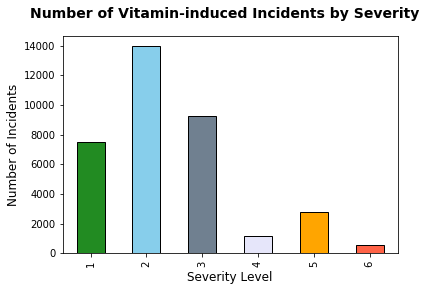

In [4]:
severity_colors = {'forestgreen', 'skyblue', 'lavender', 'orange', 'slategrey', 'tomato'}
df["Severity"].value_counts().sort_index().plot(kind="bar", color=severity_colors, edgecolor="black")
plt.suptitle("Number of Vitamin-induced Incidents by Severity", fontweight="bold", fontsize=14)
plt.xlabel("Severity Level", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)

## Total Number of Vitamin-Induced Incidents Over Time

Text(0.5, 0, 'Year')

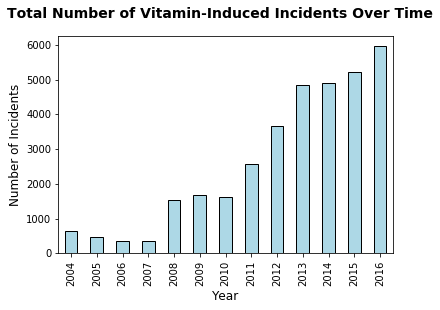

In [5]:
year = df["Year"].value_counts().sort_index()
year = year[:-1]
year.sort_index().plot(kind="bar", color='lightblue', edgecolor="black")

plt.suptitle("Total Number of Vitamin-Induced Incidents Over Time", fontsize=14, fontweight="bold")
plt.ylabel("Number of Incidents", fontsize=12)
plt.xlabel("Year", fontsize=12)

## Vitamin-Induced Incidents by Gender

In [6]:
female_years = df[df["CI_Gender"] == "Female"]["Year"].value_counts().sort_values()
male_years = df[df["CI_Gender"] == "Male"]["Year"].value_counts().sort_values()

gender_years_df = pd.DataFrame({ "Male": male_years, "Female": female_years, })
gender_years_df = gender_years_df[:-1]
gender_years_df

,Male,Female
2004,201,448
2005,153,320
2006,157,192
2007,108,239
2008,448,1091
2009,601,1091
2010,612,1014
2011,811,1772
2012,1193,2474
2013,1394,3462


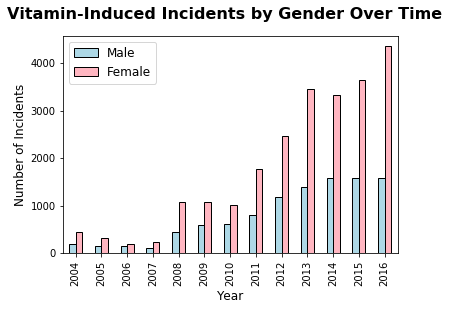

In [7]:
gender_colors = {'lightpink', 'lightblue'}
gender_years_df.plot(kind="bar", color=gender_colors, edgecolor="black")
plt.suptitle("Vitamin-Induced Incidents by Gender Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.legend(fancybox=True, loc="best", fontsize=12)

## Vitamin-Induced Incidents by Age Group Over Time

In [8]:
# create bins for to store age groups 
bins = [0, 2, 10, 17, 45, 65, np.inf]

# age titles of range
age_group = ["BABY (0-2)", "CHILD (2-10)", "TEEN (11-17)", "ADULT (18-45)", "ELDER (46-65)", "SENIOR (>65)"]
age_df = pd.cut(df["CI_Age at Adverse Event"], bins, labels=age_group, right=False)

df["Age Group2"] = age_df


baby = df[df["Age Group2"] == "BABY (0-2)"]["Year"].value_counts().sort_values()
child = df[df["Age Group2"] == "CHILD (2-10)"]["Year"].value_counts().sort_values()
teen = df[df["Age Group2"] == "TEEN (11-17)"]["Year"].value_counts().sort_values()
adult = df[df["Age Group2"] == "ADULT (18-45)"]["Year"].value_counts().sort_values()
elder = df[df["Age Group2"] == "ELDER (46-65)"]["Year"].value_counts().sort_values()
senior = df[df["Age Group2"] == "SENIOR (>65)"]["Year"].value_counts().sort_values()

age_by_year = pd.DataFrame({"BABY (0-2)": baby, 
                           "CHILD (2-10)": child, 
                           "TEEN (11-17)": teen, 
                           "ADULT (18-45)": adult, 
                           "ELDER (46-65)": elder, 
                           "SENIOR (>65)": senior, 
                           })
age_by_year = age_by_year[:-1]
age_by_year

,BABY (0-2),CHILD (2-10),TEEN (11-17),ADULT (18-45),ELDER (46-65),SENIOR (>65)
2004,NaN,7.0,8,253,227,154
2005,NaN,1.0,9,141,155,167
2006,NaN,5.0,7,135,121,81
2007,NaN,NaN,6,171,120,50
2008,1.0,15.0,26,367,492,638
2009,NaN,13.0,27,598,615,439
2010,NaN,14.0,26,497,515,574
2011,NaN,27.0,25,796,797,938
2012,1.0,43.0,53,1030,1082,1458
2013,1.0,61.0,47,1003,1423,2321


In [9]:
# fill nan to 0 
age_by_year = age_by_year.fillna(0)
age_by_year

,BABY (0-2),CHILD (2-10),TEEN (11-17),ADULT (18-45),ELDER (46-65),SENIOR (>65)
2004,0.0,7.0,8,253,227,154
2005,0.0,1.0,9,141,155,167
2006,0.0,5.0,7,135,121,81
2007,0.0,0.0,6,171,120,50
2008,1.0,15.0,26,367,492,638
2009,0.0,13.0,27,598,615,439
2010,0.0,14.0,26,497,515,574
2011,0.0,27.0,25,796,797,938
2012,1.0,43.0,53,1030,1082,1458
2013,1.0,61.0,47,1003,1423,2321


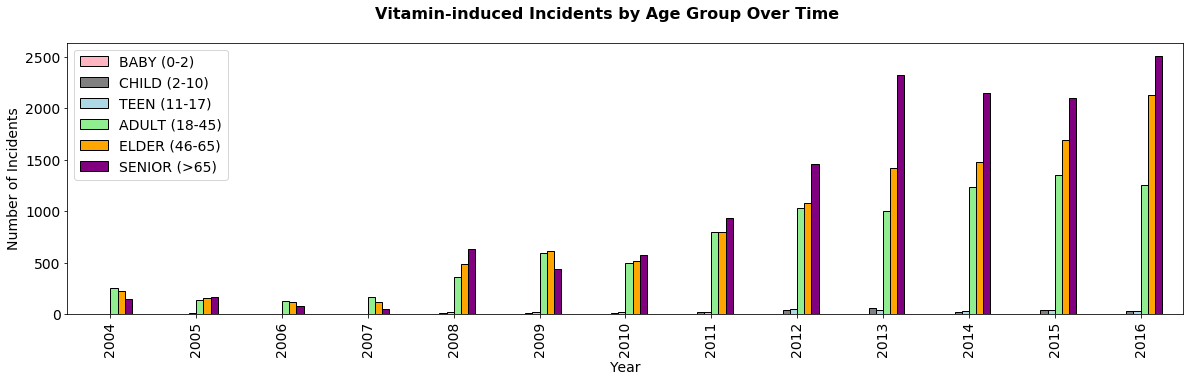

In [10]:
year_colors = {'lightpink', 'lightblue', 'lightgreen','orange', 'purple', 'grey'}
age_by_year.plot(kind="bar", figsize=(20,5), color=year_colors, 
                 edgecolor="black", fontsize=14)
plt.suptitle("Vitamin-induced Incidents by Age Group Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Incidents", fontsize=14)
plt.legend(loc="best", fontsize=14)

In [11]:
#### neal py code

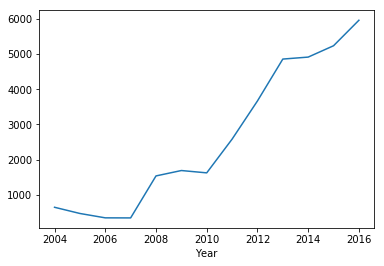

In [12]:
b=df.groupby("Year")["Outcome"].count()
b[:-1].plot()


In [13]:
c=df.groupby("Year/Month")["Outcome"].count()
c2016=c[:-5]
c20161=c[:-7]
df1=pd.DataFrame(c2016)
df1.reset_index(inplace=True)



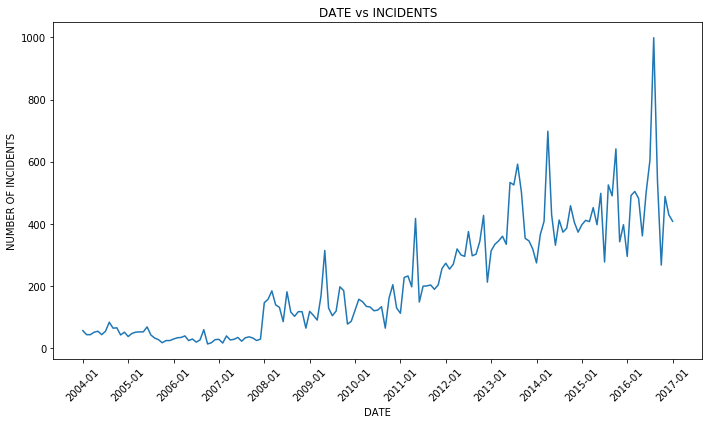

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot_date(df1["Year/Month"], c2016, '-')
plt.xticks(rotation=45)
loc = ticker.MultipleLocator(base=12) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.title("DATE vs INCIDENTS")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("DATE")
plt.tight_layout()
plt.savefig('Image/DATEvsINCIDENTS.png')
plt.show()

In [15]:
#from graph above, we see that the # of incident vs time follows geometric brownian motion
#so we will use monte carlo method to simulate the # of incident each month for next 10 years
creturn=np.log(1+c2016.pct_change())
u=np.array([creturn.mean()])
stdev=np.array([creturn.std()])
t_interval=120
iteration=100000
drift=u-.5*stdev**2
monthlychange=np.exp(drift+stdev*norm.ppf(np.random.rand(t_interval,iteration)))

In [16]:
Simulation=np.zeros_like(monthlychange)
Simulation[0]=c20161[-1]
for x in range(1,t_interval):
    Simulation[x]=Simulation[x-1]*monthlychange[x]

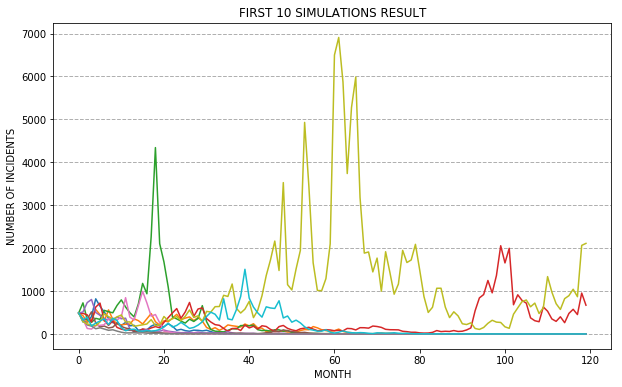

In [17]:
plt.figure(figsize=(10,6))
plt.plot(Simulation[:,:10])
plt.title("FIRST 10 SIMULATIONS RESULT")
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.grid(linestyle='--', linewidth=1, axis="y")
plt.savefig('Image/FIRST10_SIMULATIONS.png')
plt.show()

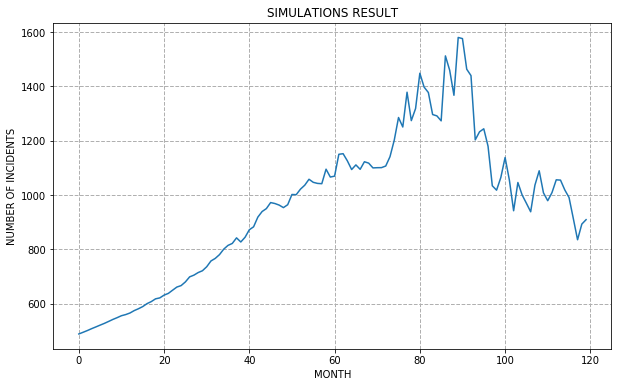

In [18]:
a=[]
for x in range(t_interval):
    a.append(Simulation[x].mean())
plt.figure(figsize=(10,6))
plt.plot(a)
plt.ylabel("NUMBER OF INCIDENTS")
plt.xlabel("MONTH")
plt.title("SIMULATIONS RESULT")
plt.grid(linestyle='--', linewidth=1, axis="both")
plt.savefig('Image/SIMULATION_RESULT.png')
plt.show()


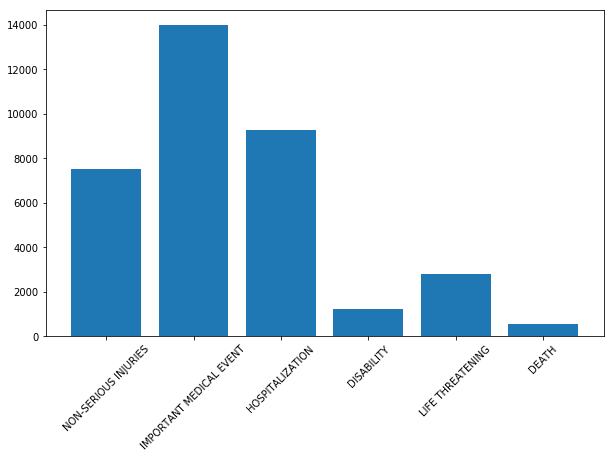

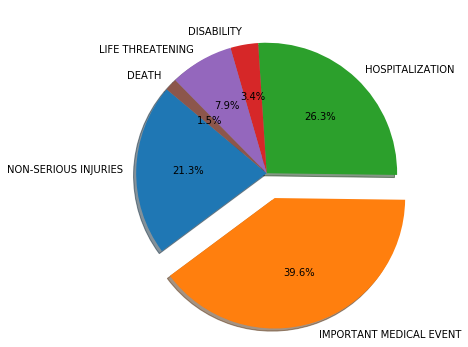

In [19]:
zz=df.groupby("Outcome")["Year"].count()
zz=pd.DataFrame(zz)
zz.reset_index(inplace=True)
zz=zz.reindex([5,3,2,1,4,0])
plt.figure(figsize=(10,6))
plt.bar(zz.Outcome,zz.Year)
exp1=np.zeros(len(zz))
exp1[1]=0.2
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
plt.pie(zz.Year, explode=exp1, labels=zz.Outcome,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

<BarContainer object of 2 artists>

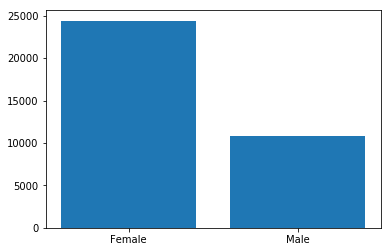

In [20]:
zz1=df.groupby("CI_Gender")["Outcome"].count()
zz1=zz1[:2]
plt.bar(["Female","Male"],zz1)

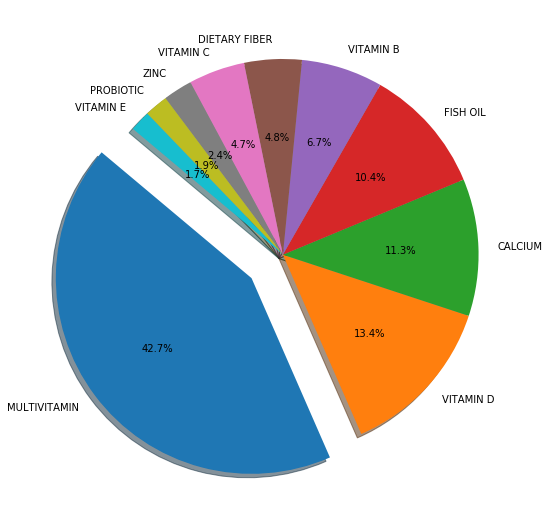

In [21]:
zz2=df.groupby("Type")["Outcome"].count()
zz2=zz2.sort_values(ascending=False)
zz2=zz2[:10]
#top 10 supplement incident
explode=np.zeros(len(zz2))
explode[0]=0.2
plt.figure(figsize=(10,9))
plt.pie(zz2.values, explode=explode, labels=zz2.index,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [22]:
dfmalesev=df[df["CI_Gender"]=="Male"]
dfmalesevsamp=dfmalesev["Severity"]
dffemalesev=df[df["CI_Gender"]=="Female"]
dffemalesevsamp=dffemalesev["Severity"]
t_stat, p_val = stats.ttest_ind(dfmalesevsamp.values, dffemalesevsamp.values, equal_var=False)
print("μ(men) is {}.format(dfmalese)")
print(f"p-value is: {p_val}")
print(f"t-test value is: {t_stat}")
print("\nHo:μ(Men Severity)-μ(Women Severity)=0\nHa:μ(Men Severity)-μ(Women Severity)≠0\n")
print(f"P_val = {round(p_val,5)}, thus p < 0.05")
print("Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women")

μ(men) is {}.format(dfmalese)
p-value is: 1.041058484452447e-61
t-test value is: 16.63702383396303

Ho:μ(Men Severity)-μ(Women Severity)=0
Ha:μ(Men Severity)-μ(Women Severity)≠0

P_val = 0.0, thus p < 0.05
Reject Null Hypothese, We conclude that there is significant difference between the mean Severity of men and women


In [23]:
dfn=df.groupby("CI_Gender")["Outcome"].value_counts()
dfn=dfn[:-1]

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

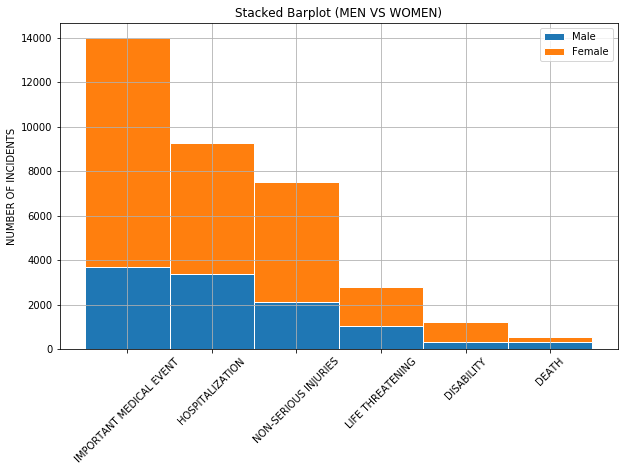

In [24]:
plt.figure(figsize=(10,6))
plt.bar(dfn.loc["Male"].index, dfn.loc["Male"].values,edgecolor="white", width=1)
plt.bar(dfn.loc["Female"].index, dfn.loc["Female"].values, bottom=dfn.loc["Male"].values,edgecolor="white", width=1)
plt.ylabel("NUMBER OF INCIDENTS")
plt.title("Stacked Barplot (MEN VS WOMEN)")
plt.grid()
plt.legend(["Male","Female"],loc="best")
plt.xticks(rotation=45)

In [25]:
bins=[0,3,14,19,46,61,1000]
group_names=["BABY","CHILD","TEENAGER","ADULT","MID-AGED","ELDER"]
df["Age Group"] = pd.cut(df["CI_Age at Adverse Event"], bins, labels=group_names)

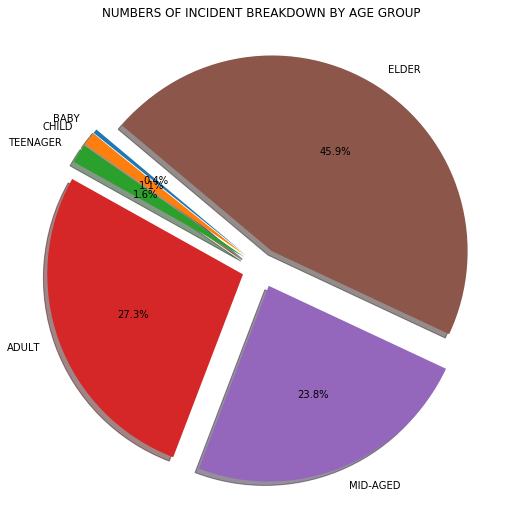

In [26]:
dfage=df.groupby("Age Group")["Outcome"].count()
dfage
explode11=np.zeros(len(dfage))
explode11[:]=0.1
plt.figure(figsize=(10,9))
plt.pie(dfage.values, explode=explode11, labels=dfage.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("NUMBERS OF INCIDENT BREAKDOWN BY AGE GROUP")
plt.show()

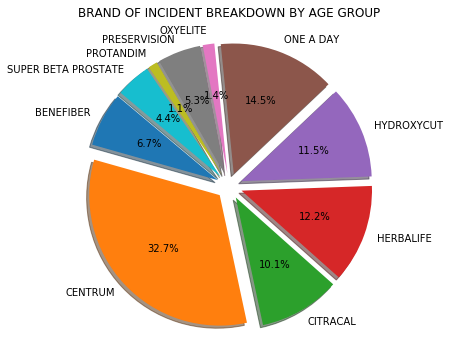

In [27]:
dfprod=df.groupby("Brand/Product")["Outcome"].count()
dfprod
explode111=np.zeros(len(dfprod))
explode111[:]=0.1
plt.figure(figsize=(10,6))
plt.pie(dfprod.values, explode=explode111, labels=dfprod.index,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("BRAND OF INCIDENT BREAKDOWN BY AGE GROUP")
plt.show()

Text(0.5, 1.0, 'Stacked Barplot by Brand/Product')

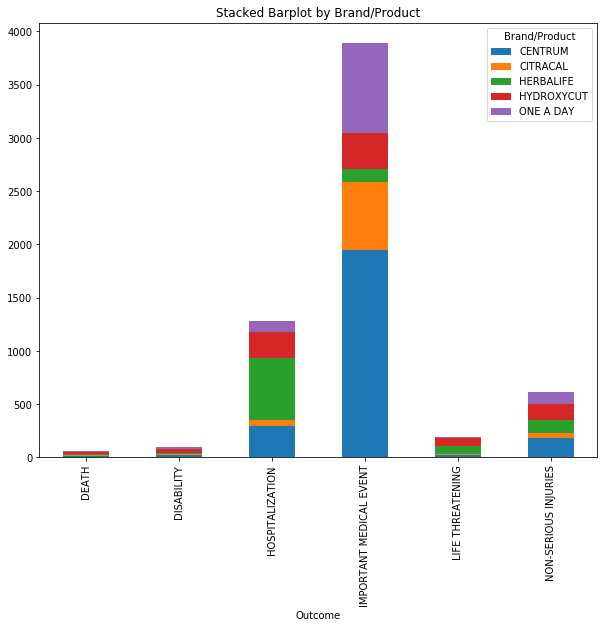

In [28]:
dfprod1=df.groupby(["Brand/Product"])["Outcome"].value_counts()
dfprod1=dfprod1.reset_index(name="Count")
dfprod1=dfprod1.loc[(dfprod1["Brand/Product"]=="CENTRUM")|(dfprod1["Brand/Product"]=="ONE A DAY")|(dfprod1["Brand/Product"]=="HERBALIFE")|(dfprod1["Brand/Product"]=="HYDROXYCUT")|(dfprod1["Brand/Product"]=="CITRACAL")]
dfprod1=dfprod1.pivot(index="Outcome", columns="Brand/Product",values="Count")
dfprod1.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Stacked Barplot by Brand/Product")

In [29]:
dfprod2=df.loc[(df["Brand/Product"]=="CENTRUM")|(df["Brand/Product"]=="ONE A DAY")|(df["Brand/Product"]=="HERBALIFE")|(df["Brand/Product"]=="HYDROXYCUT")|(df["Brand/Product"]=="CITRACAL")]
df2222=pd.DataFrame()
df2222=dfprod2.groupby(["Year","Brand/Product"])["Outcome"].count()
df2222=pd.DataFrame(df2222)
df2222.reset_index(inplace=True)
df2221=df2222.pivot(index="Year", columns="Brand/Product",values="Outcome")
df2221=df2221.fillna(0)
df2221[:-1]

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2004,6.0,3.0,9.0,12.0,8.0
2005,6.0,2.0,9.0,2.0,2.0
2006,2.0,0.0,10.0,4.0,2.0
2007,3.0,0.0,33.0,8.0,2.0
2008,51.0,25.0,58.0,17.0,138.0
2009,40.0,27.0,135.0,198.0,75.0
2010,94.0,52.0,109.0,60.0,83.0
2011,360.0,86.0,123.0,257.0,74.0
2012,519.0,118.0,113.0,220.0,117.0


In [30]:
ddd=np.log(1+df2221[:-1].pct_change())
ddd=ddd.fillna(0)
ddd=ddd.replace(np.inf, 0)
ddd["CITRACAL"][2006]=0
ddd=ddd[1:]
ddd2=np.prod(np.exp(ddd))
ddd2=ddd2*100
ddd2

C:\Users\yumikee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Brand/Product
CENTRUM       3383.333333
CITRACAL       258.666667
HERBALIFE      622.222222
HYDROXYCUT     166.666667
ONE A DAY     1287.500000
dtype: float64

Text(0.5, 1.0, 'Stacked Barplot by Brand/Product')

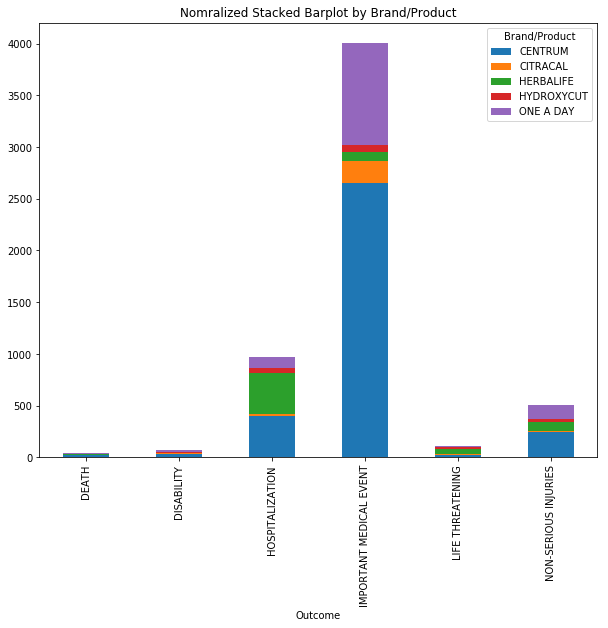

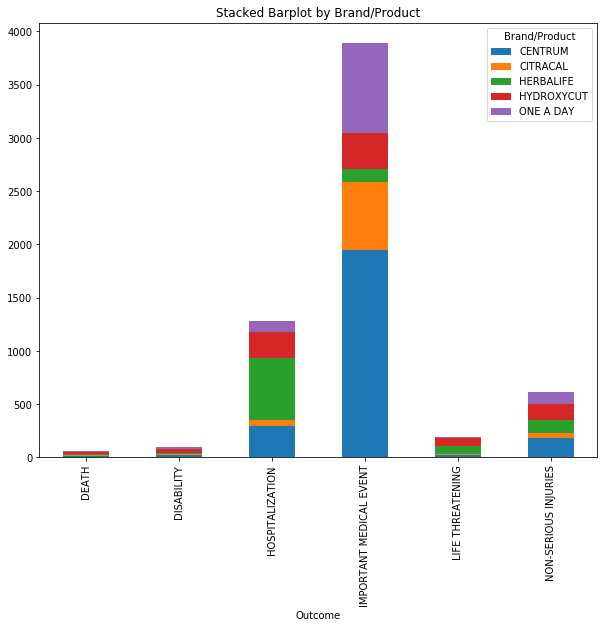

In [31]:
zzx=round(dfprod1/np.sum(dfprod1)*ddd2,0)
zzx.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Nomralized Stacked Barplot by Brand/Product")
dfprod1.plot(kind="bar", stacked=True, figsize=(10,8))
plt.title("Stacked Barplot by Brand/Product")

In [32]:
dfdd=df.groupby(["Year", "Brand/Product"])["Outcome"].value_counts()
dfdd[2004]["BENEFIBER"]

Outcome
DEATH                   1
HOSPITALIZATION         1
LIFE THREATENING        1
NON-SERIOUS INJURIES    1
Name: Outcome, dtype: int64

In [33]:
ddd3=np.exp(ddd)

ddd3 = ddd3.sort_index()
ddd3=ddd3[3:]
a=["CENTRUM","CITRACAL","HERBALIFE","HYDROXYCUT","ONE A DAY"]
ddd3
ddd3.loc[2008]=[1,1,1,1,1]
for x in a:
    for t in range(2009,2017):
        ddd3[x][t]=ddd3[x][t-1]*ddd3[x][t]
ddd3=ddd3*35
ddd3

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2008,35.000000,35.0,35.000000,35.000000,35.000000
2009,27.450980,37.8,81.465517,407.647059,19.021739
2010,64.509804,72.8,65.775862,123.529412,21.050725
2011,247.058824,120.4,74.224138,529.117647,18.768116
2012,356.176471,165.2,68.189655,452.941176,29.673913
2013,353.431373,144.2,42.844828,37.058824,57.572464
2014,255.294118,137.2,61.551724,51.470588,33.224638
2015,179.803922,148.4,46.465517,51.470588,30.181159
2016,139.313725,135.8,33.793103,41.176471,26.123188


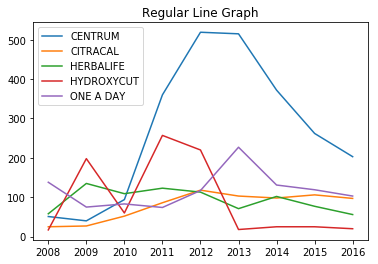

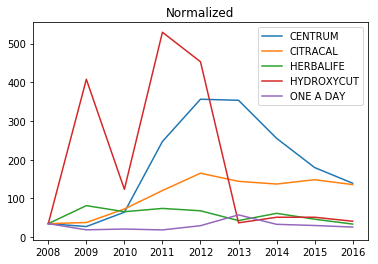

In [34]:
plt.plot(df2221[4:-1])
plt.legend(df2221.columns,loc="best")
plt.title("Regular Line Graph")
plt.show()
plt.plot(ddd3)
plt.legend(ddd3.columns,loc="best")
plt.title("Normalized")
plt.show()

In [35]:
df2221total=df2221[4:]
df2221total

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2008,51.0,25.0,58.0,17.0,138.0
2009,40.0,27.0,135.0,198.0,75.0
2010,94.0,52.0,109.0,60.0,83.0
2011,360.0,86.0,123.0,257.0,74.0
2012,519.0,118.0,113.0,220.0,117.0
2013,515.0,103.0,71.0,18.0,227.0
2014,372.0,98.0,102.0,25.0,131.0
2015,262.0,106.0,77.0,25.0,119.0
2016,203.0,97.0,56.0,20.0,103.0


In [36]:
for x in a:
    for t in range(2009,2017):
        df2221total[x][t]=df2221total[x][t-1]+df2221total[x][t]
df2221total[:-1]

C:\Users\yumikee\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2008,51.0,25.0,58.0,17.0,138.0
2009,91.0,52.0,193.0,215.0,213.0
2010,185.0,104.0,302.0,275.0,296.0
2011,545.0,190.0,425.0,532.0,370.0
2012,1064.0,308.0,538.0,752.0,487.0
2013,1579.0,411.0,609.0,770.0,714.0
2014,1951.0,509.0,711.0,795.0,845.0
2015,2213.0,615.0,788.0,820.0,964.0
2016,2416.0,712.0,844.0,840.0,1067.0


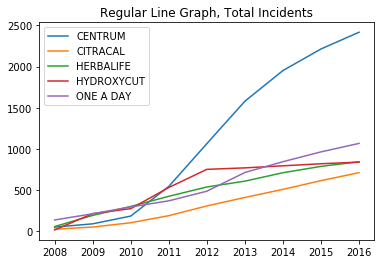

In [37]:
plt.plot(df2221total[:-1])
plt.legend(df2221total,loc="best")
plt.title("Regular Line Graph, Total Incidents")
plt.show()


In [38]:
ddd331=0
ddd331=ddd3
for x in a:
    for t in range(2009,2017):
        ddd331[x][t]=ddd331[x][t-1]+ddd331[x][t]
ddd331

Brand/Product,CENTRUM,CITRACAL,HERBALIFE,HYDROXYCUT,ONE A DAY
Year,,,,,
2008,35.000000,35.0,35.000000,35.000000,35.000000
2009,62.450980,72.8,116.465517,442.647059,54.021739
2010,126.960784,145.6,182.241379,566.176471,75.072464
2011,374.019608,266.0,256.465517,1095.294118,93.840580
2012,730.196078,431.2,324.655172,1548.235294,123.514493
2013,1083.627451,575.4,367.500000,1585.294118,181.086957
2014,1338.921569,712.6,429.051724,1636.764706,214.311594
2015,1518.725490,861.0,475.517241,1688.235294,244.492754
2016,1658.039216,996.8,509.310345,1729.411765,270.615942


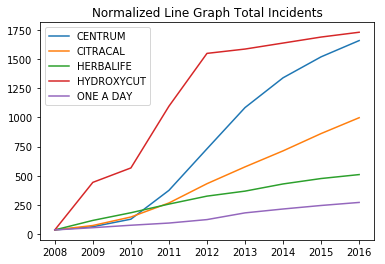

In [39]:
plt.plot(ddd331)
plt.legend(ddd331,loc="best")
plt.title("Normalized Line Graph Total Incidents")
plt.show()